<span style="color:#44f;font-weight:bold;">Codes for CNS2025: Lecture 8</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Synaptic channel open probability

\begin{equation*}
	\frac{d P_\mathrm{s}}{dt} = \alpha_\mathrm{s}(1-P_\mathrm{s}) - \beta_\mathrm{s} P_\mathrm{s}
\end{equation*}

In [2]:
Δt = 0.001
times = np.arange(0,42,Δt)-2 # From -2 to 40 (ms)
T = 2 # Pulse duration (ms)

In [3]:
αs = np.zeros_like(times)
duty = (times>0)*(times<T) # Input
αs[duty] = 1
βs = np.ones_like(times)*0.1 # Constant 0.1
Ps = np.zeros_like(times) # Open probability
# Use Euler method to integrate
for i in range(1,len(times)):
    Ps[i] = Ps[i-1]+Δt*(αs[i-1]*(1-Ps[i-1])-βs[i-1]*Ps[i-1])

When $\alpha_s\gg\beta_s$, we can ignore $\beta_s$ during the interval $T$ of the pulse.

In [4]:
print(Pmax := 1-np.exp(-T))

0.8646647167633873


In [5]:
Pp = np.zeros_like(times)
Pp[duty] = (1+(0-1)*np.exp(times[duty][0]-times))[duty]
Pp[times>=T] = (Pp[duty][-1]*np.exp(-βs*(times-times[duty][-1])))[times>=T]

In [6]:
Pu = np.zeros_like(times) # Exponential rising (assuming $\alpha_s$ and $|beta_s$ stay constant)
Pu[times>=0] = (1/1.1+(0-1/1.1)*np.exp(-1.1*times))[times>=0]

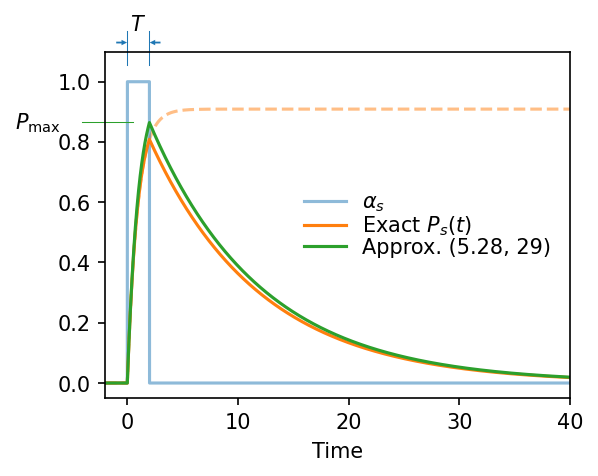

In [7]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(times,Pu,'--',color='C1',alpha=0.5)
plt.plot(times,αs,label=r'$\alpha_s$',alpha=0.5)
plt.plot(times,Ps,label='Exact $P_s(t)$')
plt.plot(times,Pp,label='Approx. (5.28, 29)')
plt.xlim(-2,40)
plt.ylim(-0.05,1.1)
plt.xlabel('Time')
plt.text(1,1.17,'$T$',ha='center')
plt.text(-6,Pmax,r'$P_\max$',ha='right',va='center')
plt.axvline(0,0.96,1.06,clip_on=False,lw=0.5)
plt.axvline(T,0.96,1.06,clip_on=False,lw=0.5)
plt.arrow(-1,1.13,0.98,0,lw=1,clip_on=False,width=0.006,edgecolor='none',head_length=0.5,length_includes_head=True)
plt.arrow(T+1,1.13,-0.98,0,lw=1,clip_on=False,width=0.006,edgecolor='none',head_length=0.5,length_includes_head=True)
plt.axhline(Pmax,-0.05,0.06,clip_on=False,lw=0.5,color='C2')
plt.legend(frameon=False,labelspacing=0)
plt.show()

### Figure 5.15 

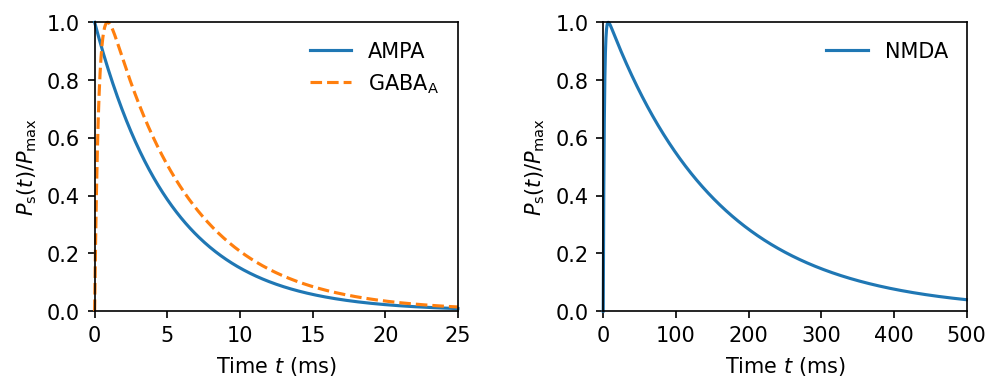

In [8]:
times = np.arange(0,25.0001,0.0625)
norm_max = lambda x:x/x.max() # Normalize by maximum

AMPA = np.exp(-times/5.26)
τ1,τr = 5.6,0.3
τ2 = 1/(1/τ1+1/τr)
GABAa = norm_max(np.exp(-times/τ1)-np.exp(-times/τ2))

f,(a,b) = plt.subplots(1,2,figsize=(7.5,2.5),dpi=150)
f.subplots_adjust(wspace=0.4)
a.plot(times,AMPA,label='AMPA',clip_on=False)
a.plot(times,GABAa,'--',label=r'GABA$_\mathrm{A}$',clip_on=False)
a.set_xlabel('Time $t$ (ms)')
a.set_ylabel(r'$P_\mathrm{s}(t)/P_\max$')
a.set_xlim(0,25)
a.set_ylim(0,1)
a.legend(frameon=False)

times1 = np.arange(0,500,0.25)
τ1,τr = 152,1.5
τ2 = 1/(1/τ1+1/τr)
NMDA = norm_max(np.exp(-times1/τ1)-np.exp(-times1/τ2))
b.plot(times1,NMDA,label='NMDA',clip_on=False)
b.set_xlim(0,500)
b.set_ylim(0,1)
b.set_xlabel('Time $t$ (ms)')
b.set_ylabel(r'$P_\mathrm{s}(t)/P_\max$')
b.legend(frameon=False)
plt.show()

In [9]:
'τ₁'.isidentifier(),'τ1'.isidentifier()

(False, True)

## Two exponentials

In [10]:
τ1 = 15
τ2 = 1
t_max = 20
τr = τ1*τ2/(τ1-τ2)
times = np.arange(0,t_max,0.1)
Pmax = ((τ2/τ1)**(τr/τ1)-(τ2/τ1)**(τr/τ2))

In [11]:
t_peak = τr*np.log(τ1/τ2)

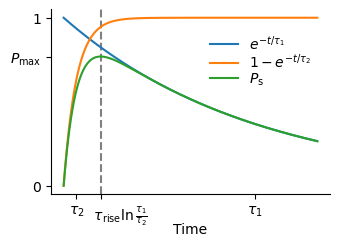

In [12]:
f,a = plt.subplots(figsize=(3.6,2.4))
plt.plot(times,np.exp(-times/τ1),clip_on=False,label=r'$e^{-t/\tau_1}$')
plt.plot(times,1-np.exp(-times/τ2),clip_on=False,label=r'$1-e^{-t/\tau_2}$')
plt.plot(times,np.exp(-times/τ1)-np.exp(-times/τ2),clip_on=False,label=r'$P_\mathrm{s}$')
for p in ['top','right']: a.spines[p].set_visible(False)
plt.xticks([τ2,t_peak,τ1],[r'$\tau_2$',r'         $\tau_\mathrm{rise}\ln\frac{\tau_1}{\tau_2}$',r'$\tau_1$'])
plt.xlabel('Time',labelpad=-4)
plt.yticks([0,Pmax,1],[0,r'$P_\max$',1])
plt.axvline(t_peak,0,1,ls='--',color='gray',zorder=-1)
plt.legend(frameon=False,labelspacing=0,loc=(0.55,0.55))
plt.show()

## Alpha function

In [13]:
times = np.arange(0,50,0.0625)
τ = 10
Ps = times*np.exp(1-times/τ)/τ

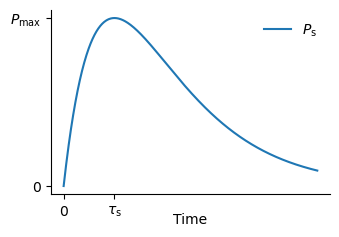

In [14]:
f,a = plt.subplots(figsize=(3.6,2.4))
a.plot(times,Ps,label=r'$P_\mathrm{s}$')
for p in ['top','right']: a.spines[p].set_visible(False)
a.set_xlabel('Time',labelpad=-4)
a.set_xticks([0,τ])
a.set_xticklabels([0,r'$\tau_\mathrm{s}$'])
a.set_yticks([0,1])
a.set_yticklabels([0,r'$P_\max$'])
a.legend(frameon=False)
plt.show()

# Short-term plasticity of synapse

Relaxation to steady state:
		\begin{equation*} \tau_\mathrm{P}\frac{dP_\mathrm{rel}}{dt} = P_0-P_\mathrm{rel}, \quad 0 < P_0 \leq 1 .\end{equation*}
		Facilitation:
		\begin{equation*} P_\mathrm{rel} \rightarrow P_\mathrm{rel} + f_\mathrm{F} (1-P_\mathrm{rel}), \quad 0\leq f_\mathrm{F} < 1.  \end{equation*}
		Depression:
		\begin{equation*} P_\mathrm{rel} \rightarrow f_\mathrm{D} P_\mathrm{rel}, \quad 0 < f_\mathrm{D} \leq 1. \end{equation*}

In [15]:
Δt = 2**-10

times = np.arange(0,1000,Δt)
Prel = np.zeros_like(times)

rates = np.arange(0,101,4)

### Facilitation

In [16]:
P0,fac,τp = 0.1,0.4,0.05

rng = np.random.default_rng(123)
m1_Prel = []
for r in rates:
    Prel[0] = P0
    for i in range(1,len(times)):
        Prel[i] = Prel[i-1]+(P0-Prel[i-1])*Δt/τp
        if rng.uniform()<r*Δt: # Simple implementation of Poisson spiking
            Prel[i] += fac*(1-Prel[i])
    m1_Prel.append(Prel.mean())
    print(f'\rrate:{r:3.0f} Hz, P_rel = {m1_Prel[-1]:g}      ',end='')
print()

m1_Prel = np.array(m1_Prel)

rate:100 Hz, P_rel = 0.708691      


### Depression

In [17]:
P0,dep,τp = 1,0.4,.5

rng = np.random.default_rng(123)
m2_Prel = []
for r in rates:
    Prel[0] = P0
    for i in range(1,len(times)):
        Prel[i] = Prel[i-1]+(P0-Prel[i-1])*Δt/τp
        if rng.uniform()<r*Δt: # Simple implementation of Poisson spiking
            Prel[i] = dep*Prel[i]
    m2_Prel.append(Prel.mean())
    print(f'\rrate:{r:3.0f} Hz, P_rel = {m2_Prel[-1]:g}      ',end='')
print()

m2_Prel = np.array(m2_Prel)

rate:100 Hz, P_rel = 0.0302813      


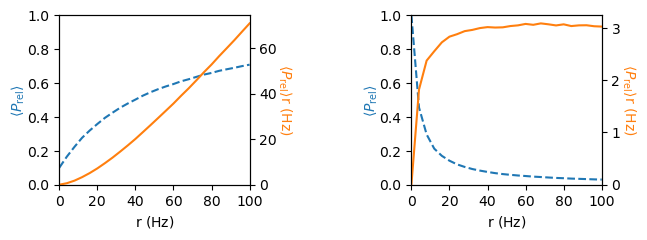

In [18]:
f,aa = plt.subplots(1,2,figsize=(7,2.2))
f.subplots_adjust(wspace=0.85)

for ms,a in zip([m1_Prel,m2_Prel],aa):
    a.plot(rates,ms,'--')
    a.set_ylim(0,1)
    a.set_xlim(0,100)
    a.set_xticks(range(0,101,20))
    a.set_ylabel(r'$\langle P_\mathrm{rel}\rangle$',labelpad=0,color='C0')
    a.set_xlabel(r'$\mathrm{r}$ (Hz)')
    a = a.twinx()
    a.plot(rates,ms*rates,color='C1')
    a.set_ylim(0,)
    a.set_ylabel(r'$\langle P_\mathrm{rel}\rangle\mathrm{r}$ (Hz)',rotation=-90,labelpad=12,color='C1')
plt.show()

### Analytical solutions
Facilitation:
$$ \langle P_\mathrm{rel}\rangle = \frac{P_0+\mathrm{r}f_\mathrm{F}\tau_\mathrm{P}}{1+\mathrm{r}f_\mathrm{F}\tau_\mathrm{P}}$$
Depression:
$$ \langle P_\mathrm{rel}\rangle = \frac{P_0}{1+(1-f_\mathrm{D})\mathrm{r}\tau_\mathrm{P}} \tag{5.41} $$

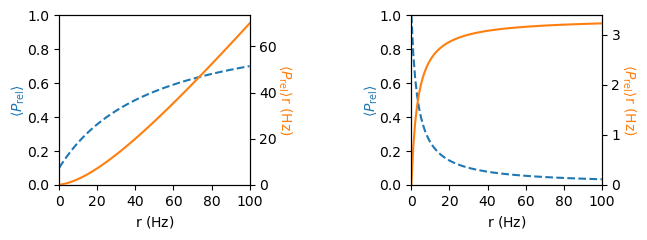

In [19]:
f,aa = plt.subplots(1,2,figsize=(7,2.2))
f.subplots_adjust(wspace=0.85)

P0_f,f_fac,tau_f = 0.1,0.4,0.05
P0_d,f_dep,tau_d = 1.0,0.4,0.5

rates = np.arange(0,101)
for ms,a in zip([
    (P0_f+rates*f_fac*tau_f)/(1+rates*f_fac*tau_f),
    P0_d/(1+(1-f_dep)*rates*tau_d)
],aa):
    a.plot(rates,ms,'--')
    a.set_ylim(0,1)
    a.set_xlim(0,100)
    a.set_xticks(range(0,101,20))
    a.set_ylabel(r'$\langle P_\mathrm{rel}\rangle$',labelpad=0,color='C0')
    a.set_xlabel(r'$\mathrm{r}$ (Hz)')
    a = a.twinx()
    a.plot(rates,ms*rates,color='C1')
    a.set_ylabel(r'$\langle P_\mathrm{rel}\rangle\mathrm{r}$ (Hz)',rotation=-90,labelpad=12,color='C1')
    a.set_ylim(0,)
plt.show()

In [20]:
dt = 2**-10
times = np.arange(0,1.200,dt)
rs = np.zeros_like(times)
tt = 0
for [rate,time] in (rate_changes:=np.array([
    [25,.2],
    [100,.5],
    [10,1.],
    [40,1.2]
])):
    rs[times>=tt],tt = rate,time

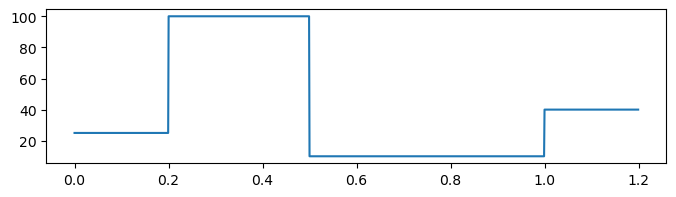

In [21]:
plt.figure(figsize=(8,2))
plt.plot(times,rs)
plt.show()

In [22]:
P0,dep,tau_p = 1,0.6,0.5

In [23]:
Prel_acc = np.zeros_like(times) # Accumulation of P_rel
num_trials = 16
trial_count = 0
while trial_count<num_trials: # Accumulate over 1024 trials
    Prel = np.zeros_like(times)
    Prel[0] = P0/(1+(1-dep)*rs[0]*tau_p)
    for i in range(1,len(times)):
        Prel[i] = Prel[i-1]+(P0-Prel[i-1])*dt/tau_p
        if rng.uniform()<rs[i]*dt: # Simple implementation of Poisson spiking
            Prel[i] = dep*Prel[i]
    Prel_acc += Prel
    trial_count += 1
    print(f'\rcnt:{trial_count:6d}  ',end='',flush=True)
print(f'\rcnt:{trial_count:6d} Done!')

cnt:    16 Done!


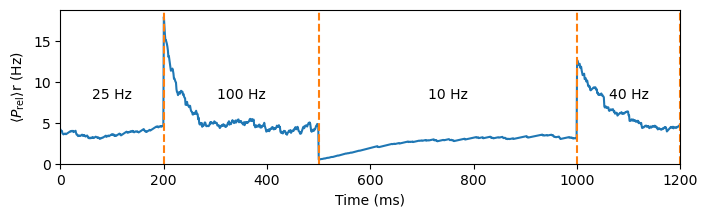

In [24]:
f,a = plt.subplots(figsize=(8,2))
a.plot(times*1000,Prel_acc*rs/num_trials) # Plot trial average
a.set_xlim(0,1200)
a.set_ylim(0,)
a.set_xlabel('Time (ms)')
a.set_ylabel(r'$\langle P_\mathrm{rel}\rangle\mathrm{r}$ (Hz)')
for tt in rate_changes[:,1]*1000: a.axvline(tt,ls='--',color='C1')
tt = 0
for rate,time in rate_changes:
    a.text((time+tt)*500,8,f'{rate:g} Hz',ha='center')
    tt = time
plt.show()

Combining with spiking, the depression dynamics is given by
$$ \frac{d P_\mathrm{rel}}{dt} = \frac{1}{\tau_\mathrm{P}}\left(P_0-P_\mathrm{rel}\right)-\left(1-f_\mathrm{D}\right)\sum_i\delta\left(t-t_i\right) P_\mathrm{rel}$$
Making trial average of the equation for depression:
$$ \frac{d \langle P_\mathrm{rel}\rangle}{dt} = \frac{1}{\tau_\mathrm{P}}\left(P_0-\langle P_\mathrm{rel}\rangle\right)-\left(1-f_\mathrm{D}\right)\left\langle \sum_i\delta\left(t-t_i\right) P_\mathrm{rel}\right\rangle .$$
By the property of Poisson spike train, since the release fraction $P_\mathrm{rel}(t)$ only depends on past spikes (with $t_i<t$), it is not correlated with whether there is a spike at time $t$. We thus have
\begin{eqnarray*}
\left\langle \sum_i\delta\left(t-t_i\right) P_\mathrm{rel}\right\rangle & = & \left\langle \sum_i\delta\left(t-t_i\right)\right\rangle  \left\langle P_\mathrm{rel}\right\rangle \\
& = & \mathrm{r}(t) \left\langle P_\mathrm{rel}\right\rangle
\end{eqnarray*}

And, the ODE for the release probability is:
$$ \frac{d \left\langle P_\mathrm{rel}\right\rangle}{dt} = \frac{1}{\tau_\mathrm{P}} \left\{P_0-\left[1+\left(1-f_\mathrm{D}\right)\mathrm{r}\right]\left\langle P_\mathrm{rel}\right\rangle\right\}$$
We can integrate this out numerically...

In [25]:
def slope_Prel(t,Prel):
    return (P0-(1+(1-dep)*rs[int(t/dt)]*tau_p)*Prel)/tau_p
def euler_step(t,y,f,dt):
    dyt = f(t,y)
    return y+dt*dyt

In [26]:
y = P0/(1+(1-dep)*rs[0]*tau_p)
ys = [y:=euler_step(t,y,slope_Prel,dt) for t in times]

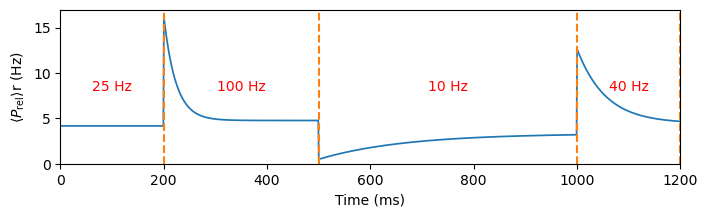

In [27]:
f,a = plt.subplots(figsize=(8,2))
a.plot(times*1000,ys*rs,lw=1.25)
a.set_xlim(0,1200)
a.set_ylim(0,)
a.set_xlabel('Time (ms)')
a.set_ylabel(r'$\langle P_\mathrm{rel}\rangle\mathrm{r}$ (Hz)')
for tt in rate_changes[:,1]*1000: a.axvline(tt,ls='--',color='C1')
tt = 0
for rate,time in rate_changes:
    a.text((time+tt)*500,8,f'{rate:g} Hz',ha='center',color='r')
    tt = time
plt.show()

# Use Brian2 to calculate averaged release fraction

In [28]:
import brian2 as b2

In [29]:
def rate_steps(t):
    return 25*(t<0.2)+100*(t>=0.2)-90*(t>=0.5)+30*(t>1.0)

In [30]:
times = np.arange(0,1.2,b2.defaultclock.dt/b2.second)

In [31]:
rates = b2.TimedArray(rate_steps(times)*b2.Hz,b2.defaultclock.dt)

In [32]:
P0 = 1
dep = 0.6
tau_p = 0.5*b2.second

In [33]:
G = b2.NeuronGroup(1,'''
dP/dt = (P0-(1+(1-dep)*r*tau_p)*P)/tau_p : 1
r = rates(t) : Hz
''',method='euler')

In [34]:
M = b2.StateMonitor(G,variables=True,record=True)

In [35]:
b2.run(1.2*b2.second)

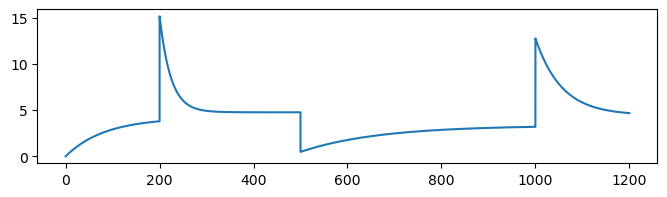

In [36]:
plt.figure(figsize=(8,2))
plt.plot(M.t/b2.ms,M.r[0]*M.P[0])
plt.show()

### Using a parameter for rate

In [37]:
G1 = b2.NeuronGroup(1,'''
dP/dt = (P0-(1+(1-dep)*rt*tau_p)*P)/tau_p : 1
r = rt : Hz
''',method='euler') # The `r` is only for keeping track of the rate
M1 = b2.StateMonitor(G1,variables=True,record=True)
net = b2.Network(G1,M1)

In [38]:
# Partition run into different segments
rt = 25*b2.Hz
net.run(0.2*b2.second)

rt = 100*b2.Hz
net.run(0.3*b2.second)

rt = 10*b2.Hz
net.run(0.5*b2.second)

rt = 0.04*b2.kHz
net.run(200*b2.ms)

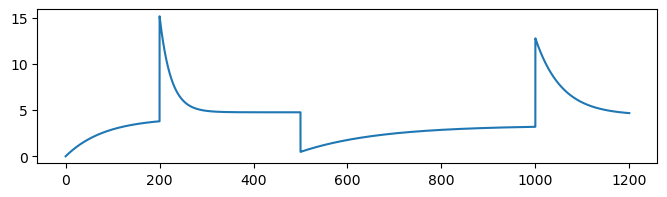

In [39]:
plt.figure(figsize=(8,2))
plt.plot(M1.t/b2.ms,M1.P[0]*M1.r[0])
plt.show()

# System of two integrate-and-fire neurons in a class

In [40]:
def euler_step(t,y,f,dt):
    dyt = f(t,y)
    return y+dt*dyt

In [41]:
class TwoIntegrateFire:
    def __init__(
        self,El=-70,Vth=-54,Vr=-80,tau_m=20,
        rmgs=0.05,Pmax=1,RmIe=25,tau_s=10,Es=0
    ):
        self.El = El
        self.Vth = Vth
        self.Vr = Vr
        self.tau_m = tau_m
        self.rmgs = rmgs
        self.Pmax = Pmax
        self.RmIe = RmIe
        self.tau_s = tau_s
        self.Es = Es
    def slope(self,t,y): # slope function
        [V1,V2,s1,s2] = y
        return np.array([
            (self.El-V1
             -self.rmgs*self.Pmax*s1/self.tau_s
             *np.exp(1-s1/self.tau_s)
             *(V1-self.Es)+self.RmIe)/self.tau_m,
            (self.El-V2
             -self.rmgs*self.Pmax*s2/self.tau_s
             *np.exp(1-s2/self.tau_s)
             *(V2-self.Es)+self.RmIe)/self.tau_m,
            1,1
        ])
    def integrate(
        self,tt,dt,
        v0=np.array([-70.,-70.,0.,1.]),
        t0=0,
        itg=euler_step
    ):
        '''
        Parameters
        ----------
         tt  :  Simulated time duration
         dt  :  Time step size
         v0  :  Initial states
         t0  :  Initial time
         itg :  Integrator

        Return
        ------
        tis :  Time frames
        vms :  State traces
        spt :  Spike trains
        '''
        nf = int(tt/dt) # Number of time frames
        ti = t0 # Time
        vm = v0 # States
        # Traces
        tis = []   # Time frames
        vms = []   # Membrane potential
        spt = []   # Spike train
        for i in range(nf):
            vm = itg(ti,vm,self.slope,dt)
            if sp1:=vm[0]>self.Vth:
                vm[0] = self.Vr # V1
                vm[3] = 0       # s2
            if sp2:=vm[1]>self.Vth:
                vm[1] = self.Vr # V2
                vm[2] = 0       # s1
            ti += dt
            tis.append(ti)
            vms.append(vm)
            spt.append([sp1,sp2])
        return np.array(tis),np.array(vms),np.array(spt) 

In [42]:
ifm = TwoIntegrateFire()
v0 = np.array([-70.,-70.,0.,1.])
t0 = 0

## Excitatory

In [43]:
ifm.Es = 0 # Excitatory coupling

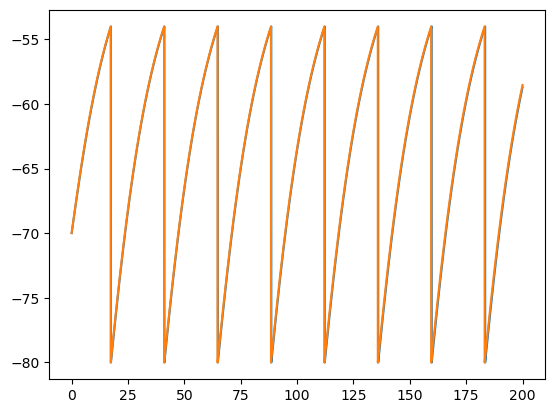

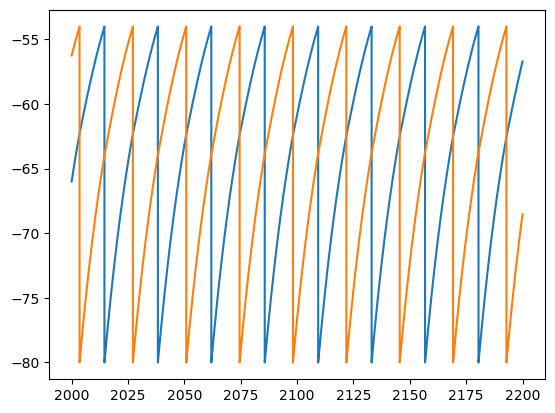

In [44]:
tis,vms,spt = ifm.integrate(200,0.01,v0,t0)
v0,t0 = vms[-1],tis[-1]
plt.plot(tis,vms[:,0])
plt.plot(tis,vms[:,1])
plt.show()

tis,vms,spt = ifm.integrate(1800,0.01,v0,t0)
v0,t0 = vms[-1],tis[-1]

tis,vms,spt = ifm.integrate(200,0.01,v0,t0)
v0,t0 = vms[-1],tis[-1]
plt.plot(tis,vms[:,0])
plt.plot(tis,vms[:,1])
plt.show()

## Inhibitory

In [45]:
ifm.Es = -80 # Set coupling to inhibitory

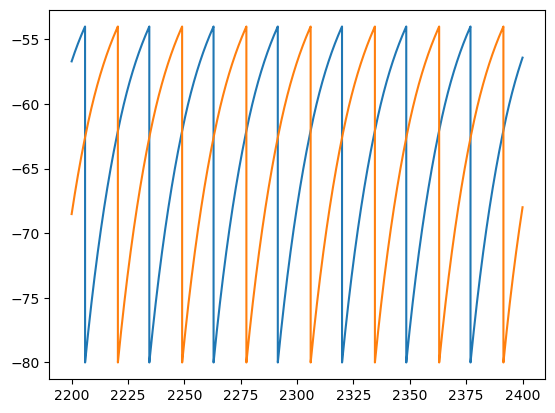

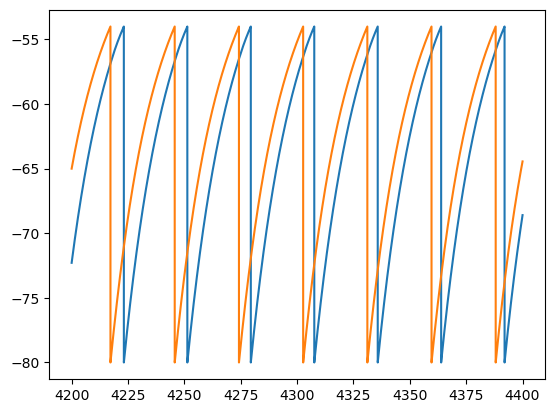

In [46]:
tis,vms,spt = ifm.integrate(200,0.01,v0,t0)
v0,t0 = vms[-1],tis[-1]
plt.plot(tis,vms[:,0])
plt.plot(tis,vms[:,1])
plt.show()

tis,vms,spt = ifm.integrate(1800,0.01,v0,t0)
v0,t0 = vms[-1],tis[-1]

tis,vms,spt = ifm.integrate(200,0.01,v0,t0)
v0,t0 = vms[-1],tis[-1]
plt.plot(tis,vms[:,0])
plt.plot(tis,vms[:,1])
plt.show()

# LIF on Brian2

In [47]:
if 'ms' in globals(): del ms

In [48]:
ifn_eq = '''
dV/dt = (El-V-rmgs*Pmax*s/tau_s*exp(1-s/tau_s)*(V-Es)+RmIe)/tau_m : volt
ds/dt = 1 : second
'''

In [49]:
# parameters
El = -70*b2.mV
Vth = -54*b2.mV
Vreset = -80*b2.mV
tau_m = 20*b2.ms
rmgs = 0.05
Pmax = 1
RmIe = 25*b2.mV
tau_s = 10*b2.ms

# set default step size of simulation
b2.defaultclock.dt = 0.01*b2.ms

In [50]:
# setup system
nrn = b2.NeuronGroup(2,ifn_eq,threshold='V>Vth',reset='V=Vreset',method='euler')
syn = b2.Synapses(nrn,nrn,on_pre='s_post = 0*ms')
syn.connect()
net = b2.Network(nrn,syn)
# initial states
nrn.V = np.array([-70.,-70.])*b2.mV
nrn.s = np.array([0.,1.])*b2.ms

In [51]:
Es = 0*b2.mV # Excitatory

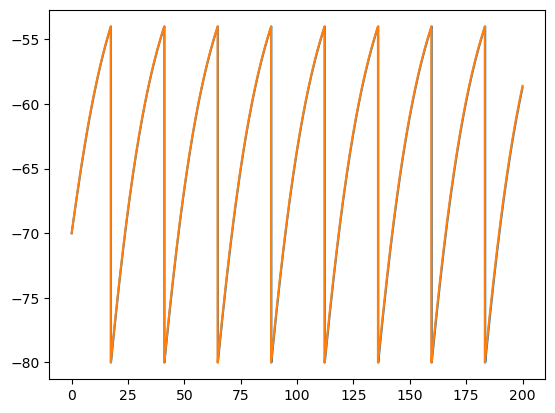

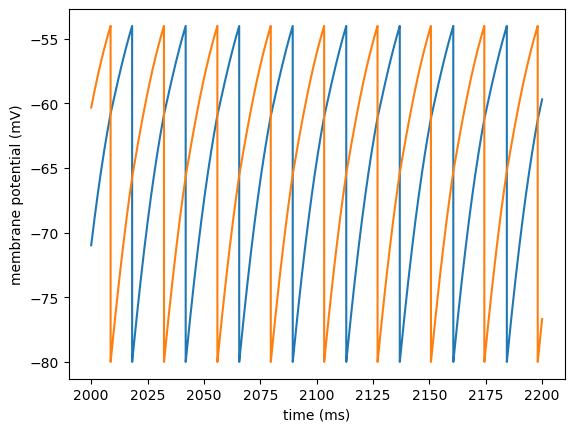

In [52]:
# setup monitors
mon = b2.StateMonitor(nrn,'V',record=True)
net.add(mon)
# run the system
net.run(200*b2.ms)
plt.plot(mon.t/b2.ms,mon.V[0]/b2.mV)
plt.plot(mon.t/b2.ms,mon.V[1]/b2.mV)
plt.show()

net.run(1800*b2.ms)

# setup monitors
mon = b2.StateMonitor(nrn,'V',record=True)
net.add(mon)
# run the system
net.run(200*b2.ms)
plt.plot(mon.t/b2.ms,mon.V[0]/b2.mV)
plt.plot(mon.t/b2.ms,mon.V[1]/b2.mV)
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.show()

In [53]:
Es = -80*b2.mV

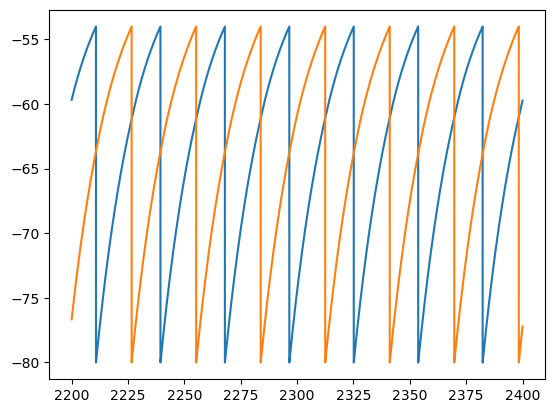

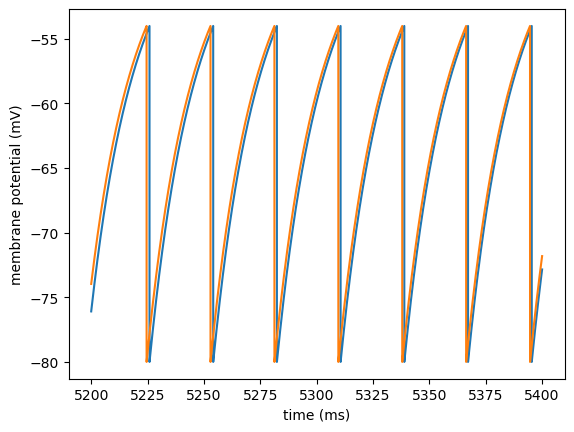

In [54]:
# setup monitors
mon = b2.StateMonitor(nrn,'V',record=True)
net.add(mon)
# run the system
net.run(200*b2.ms)
plt.plot(mon.t/b2.ms,mon.V[0]/b2.mV)
plt.plot(mon.t/b2.ms,mon.V[1]/b2.mV)
plt.show()

net.run(2800*b2.ms)

# setup monitors
mon = b2.StateMonitor(nrn,'V',record=True)
net.add(mon)
# run the system
net.run(200*b2.ms)
plt.plot(mon.t/b2.ms,mon.V[0]/b2.mV)
plt.plot(mon.t/b2.ms,mon.V[1]/b2.mV)
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.show()

# FitzHugh–Nagumo model
\begin{align*}
\frac{dv}{dt} & = v-\frac{v^3}{3}-w+R I_\mathrm{ext} \\
\tau\frac{dw}{dt} & = v+a-b w
\end{align*}

| Parameter | Description | Variable |
| --- | --- | --- |
| $R$ | Membrane resistance | `mr` |
| $I_\mathrm{ext}$ | External current | `ie` |
| $a$ | Parameter A | `fa` |
| $b$ | Parameter B | `fb` |
| $\tau$ | Time constant | `tw` |

In [55]:
mr = 50
ie = 0
fa = 0.66
fb = 0.5
tw = 10

In [56]:
def fhn_slope(t,x):
    return np.array([
        x[0]-x[0]**3/3-x[1]+mr*ie,
        (x[0]+fa-fb*x[1])/tw
    ])

In [57]:
def get_traces(tt,dt,xi,ies=None,slope=fhn_slope,itg=euler_step):
    global ie
    nf = int(tt/dt)
    if ies is None: ies = np.zeros(nf)
    ti = 0
    x = xi
    # Traces
    tis = []   # Time frames
    xs = []    # Traces
    for i in range(nf):
        ie = ies[i%len(ies)]
        #print(x)
        x = itg(ti,x,slope,dt)
        ti += dt
        tis.append(ti)
        xs.append(x.copy())
    return np.array(tis),np.array(xs) 

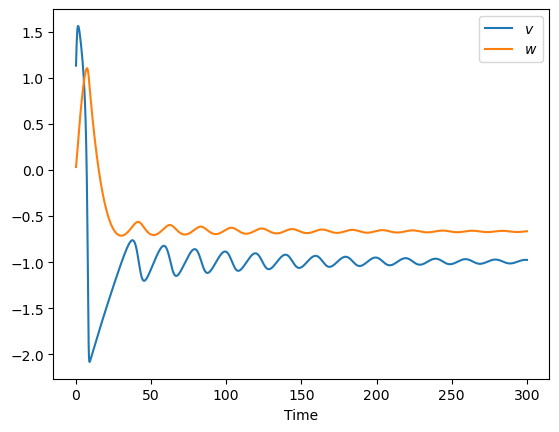

In [58]:
ts,xs = get_traces(300.0,0.2,np.array([1.,0.]))

plt.plot(ts,xs[:,0],label='$v$')
plt.plot(ts,xs[:,1],label='$w$')
plt.xlabel('Time')
plt.legend()
plt.show()

<hr>
<address style="color:#44f;font-style:italic;font-weight:bold;"><a href="https://cc.tir.tw/wk/2025cns">CNS2025</a></address>